In [186]:
import numpy as np
import dill
import importlib
import sys
import os
import matplotlib.pyplot as plt
'''
v4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3

As of 1/13/23, the only change is the addition of the decision to action delay
'''

'\nv4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3\n\nAs of 1/13/23, the only change is the addition of the decision to action delay\n'

# Select Exp1 or Exp2

In [187]:
experiment = 'Exp2'

In [188]:
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Analysis_and_Statistics') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Analysis_and_Statistics') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis') 
import Optimal_Stopping_Object_v4
import Exp2_Subject_Object 
import Subject_Object
from plot_functions import *
importlib.reload(Optimal_Stopping_Object_v4) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file

<module 'Optimal_Stopping_Object_v4' from 'D:\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Optimal_Model\\Analysis\\Optimal_Stopping_Object_v4.py'>

# Initial Thangs

In [189]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = r'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    
if experiment == 'Exp1':
    tp3_title = "1000 (50)"
    tp4_title = "1000 (150)"
    tp5_title = '1100 (50)'
    tp6_title = "1100 (150)"
    tp7_title = "1200 (50)"
    tp8_title = '1200 (150)'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    num_blocks = len(trial_block_titles)
num_subjects

5

# Pickle Data

In [190]:
NUM_STDS = 2
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
exp1_group = dill.load((open(load_path + f'group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
# exp1_group.analyze_data()

In [191]:
NUM_STDS = 2
append_dict = {0:'reaction_time_no_sd_off',1:'reaction_time_minus_sd',2:'reaction_time_minus_2sd'}
load_path = r'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_Exp2\Subjects_Analyzed\\'
exp2_group = dill.load((open(load_path + f'group_object_{append_dict[NUM_STDS]}.pkl', 'rb')))
exp2_group.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Analysis_and_Statistics\Exp2_Subject_Object.py:387: RuntimeWarning: Mean of empty slice
  self.binned_player_task_leave_times_mean            = np.nanmean(self.binned_player_task_leave_times,axis=2) # Mean for each bin, each condition
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Analysis_and_Statistics\Exp2_Subject_Object.py:388: RuntimeWarning: Mean of empty slice
  self.binned_player_minus_agent_task_leave_time_mean = np.nanmean(self.binned_player_minus_agent_task_leave_time,axis=2)


# Create Model

In [192]:
if experiment == 'Exp1':
    group = exp1_group
    rt = group.adjusted_reaction_time_mean
    mt = group.reaction_movement_time_mean
    rt_sd = group.reaction_time_sd
    mt_sd = group.reaction_movement_time_sd
    time_sd = group.coincidence_reach_time_sd
    perc_wins_both_reach = np.nanmean(group.perc_gamble_wins_when_both_decide,axis=0)
    
elif experiment == 'Exp2':
    group = exp2_group
    rt = np.nanmean(group.react_reaction_time_only_react)-40
    mt = np.nanmean(group.react_movement_time_only_react)-100
    rt_sd = np.nanstd(group.react_reaction_time_only_react)
    mt_sd = np.nanstd(group.react_movement_time_only_react)
    time_sd = np.array([np.nanstd(group.coincidence_reach_time)]*4)
    perc_wins_both_reach = np.nanmean(group.perc_gamble_wins_when_both_decide,axis=0)

    
    
group_model = Optimal_Stopping_Object_v4.Optimal_Decision_Time_Model(
    experiment=experiment, num_blocks = 4, BETA_ON = False,
    agent_means = np.array([1100]*4),agent_sds = np.array([50]*4), 
    reaction_time = np.nanmean(group.react_reaction_time_only_react)-40 , movement_time = np.nanmean(group.react_movement_time_only_react)-100,
    reaction_uncertainty = np.nanstd(group.react_reaction_time_only_react), movement_uncertainty = np.nanstd(group.react_movement_time_only_react),
    timing_uncertainty = np.array([np.median(np.nanstd(group.coincidence_reach_time,axis=1))]*4),
    perc_wins_when_both_reach = np.nanmean(group.perc_gamble_wins_when_both_decide,axis=0),
    decision_action_delay_uncertainty = 10, decision_action_delay_mean = 50,
    unknown_gamble_uncertainty_on = False, unknown_gamble_uncertainty = 100,
    unknown_gamble_delay_on = False, unknown_gamble_delay = 200,
    known_gamble_uncertainty_on = False, known_gamble_uncertainty = 150,
    known_gamble_delay_on = False, known_gamble_delay = 150
    )
group_model.run_model()
group_model_tuned = group_model

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:61: RuntimeWarning: invalid value encountered in subtract
  return EX2 - EX**2
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:58: RuntimeWarning: invalid value encountered in subtract
  ans = (EX3 - 3*EX*(EX2 - EX**2) - EX**3)/((EX2 - EX**2)**(3/2))
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:58: RuntimeWarning: invalid value encountered in power
  ans = (EX3 - 3*EX*(EX2 - EX**2) - EX**3)/((EX2 - EX**2)**(3/2))
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:331: RuntimeWarning: invalid value encountered in sqrt
  self.cutoff_agent_gamble_sd = np.sqrt(self.cutoff_var)


# Tune Model

In [193]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.9f}".format(x)})
o = group_model_tuned

print(f'Reaction Time Mean (SD):         {o.reaction_time:0.3f} ({o.reaction_uncertainty:0.3f})')
print(f'Movement Time Mean (SD):         {o.movement_time:0.3f} ({o.movement_uncertainty:0.3f})')
print(f'Timing Uncertainty:              {o.timing_uncertainty}')
print(f'Decision Action Delay Mean (SD): {o.decision_action_delay_mean} ({o.decision_action_delay_uncertainty})')
print(f'Unknown Gamble Delay:            {o.unknown_gamble_delay_on}-{o.unknown_gamble_delay}')
print(f'Known Gamble Delay:              {o.known_gamble_delay_on}-{o.known_gamble_delay}')
print(f'Unknown Gamble Uncertainty:      {o.unknown_gamble_uncertainty_on}-{o.unknown_gamble_uncertainty}')
print(f'Known Gamble Uncertainty:        {o.known_gamble_uncertainty_on}-{o.known_gamble_uncertainty}')
print(f'Reaction Gamble Cutoff:          {o.weird_reaction_gamble_cutoff}')

Reaction Time Mean (SD):         299.102 (37.077)
Movement Time Mean (SD):         91.624 (80.392)
Timing Uncertainty:              [61.509622012 61.509622012 61.509622012 61.509622012]
Decision Action Delay Mean (SD): 50 (10)
Unknown Gamble Delay:            False-200
Known Gamble Delay:              False-150
Unknown Gamble Uncertainty:      False-100
Known Gamble Uncertainty:        False-150
Reaction Gamble Cutoff:          0


In [194]:
if True:
    data_wins = np.median(group.player_perc_wins,axis=0)
    data_indecisions = np.median(group.player_perc_indecisions,axis=0)
    data_incorrects = np.median(group.player_perc_incorrects,axis=0)
    data_leave_target_time = np.median(np.nanmedian(group.player_task_leave_time,axis=2) ,axis=0)
    data_reaction_decisions = np.median(group.perc_reaction_decisions,axis=0)
    data_gamble_decisions = np.median(group.perc_gamble_decisions,axis=0)
    data_reaction_leave_time = np.nanmedian(np.nanmedian(group.player_reaction_task_leave_time,axis=2),axis=0)
    data_gamble_leave_time = np.nanmedian(np.nanmedian(group.player_gamble_task_leave_time,axis=2),axis=0)
    tune_data = [data_wins,data_indecisions,data_incorrects,data_leave_target_time,
                data_reaction_decisions,data_gamble_decisions,data_reaction_leave_time,data_gamble_leave_time]
    group_model_tuned.fit_model_to_data(tune_data)
    group_model = group_model_tuned
    group_model.calculate_metrics_with_certain_decision_time(group_model.fit_decision_times_dict['Leave Target Time'])

c:\Users\Seth Sullivan\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:594: RuntimeWarning: invalid value encountered in true_divide
  self.perc_gambles_that_were_wins_optimal_calc          = ((self.prob_win_gamble_optimal_calc)/self.prob_selecting_gamble_optimal_calc)*100
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping_Object_v4.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.perc_gambles_that_were_incorrects_optimal_calc    = ((self.prob_incorrect_gamble_optimal_calc)/self.prob_selecting_gamble_optimal_calc)*100
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis\Optimal_Stopping

In [195]:
# group_model = Optimal_leave_time_Model(reaction_time = 300, movement_time = 100, incorrect_cost = 0,
#                                           reaction_uncertainty = 0.00001, movement_uncertainty = 0.00001,
#                                           timing_uncertainty = 0.00001,
#                                           decision_action_delay_uncertainty = 0.00001, decision_action_delay_mean = 50,
#                                          )

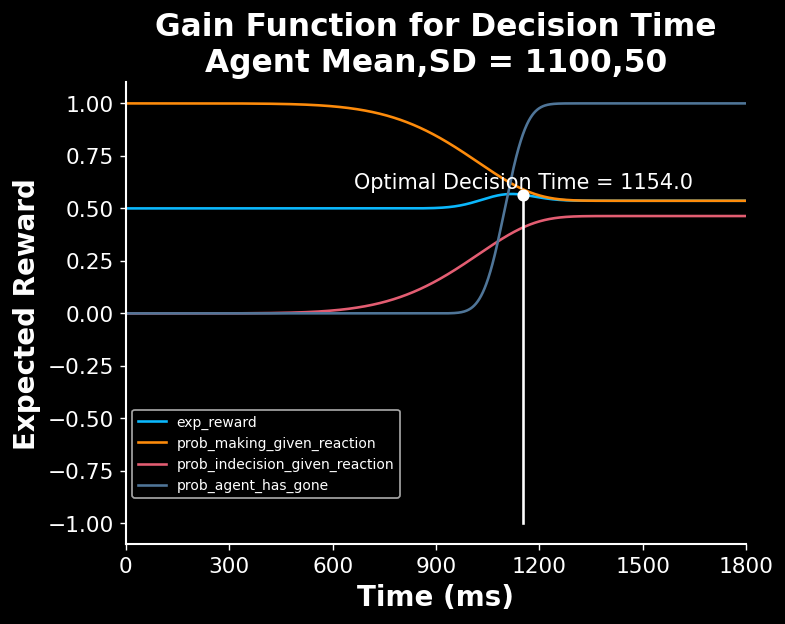

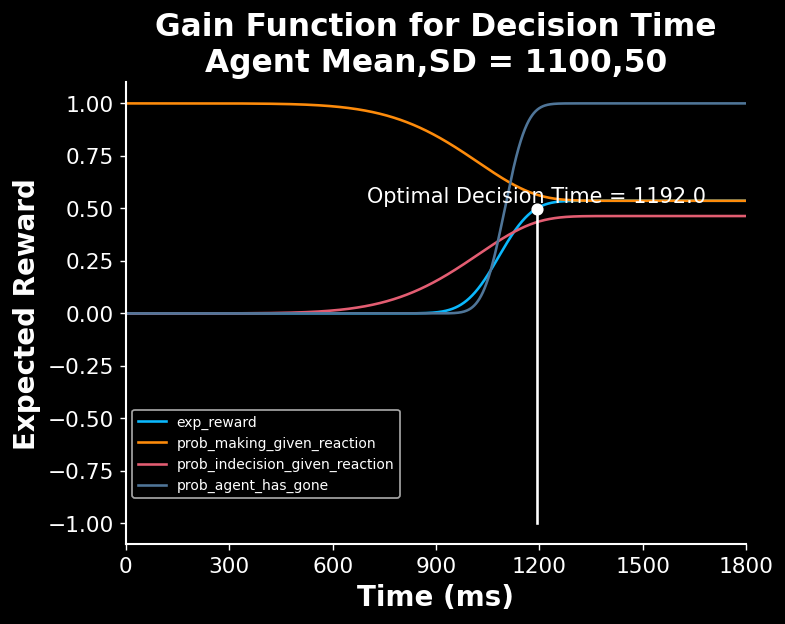

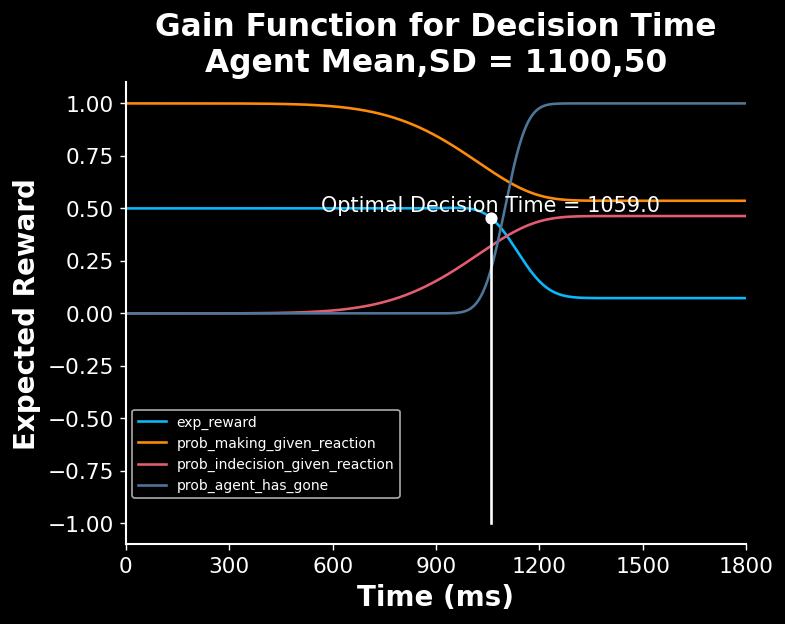

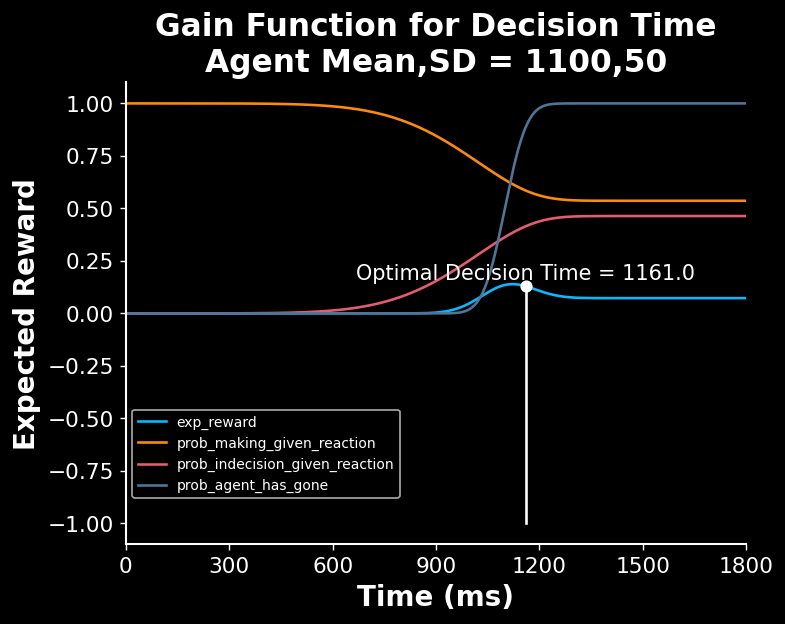

In [196]:
group_model.plot_optimals(metrics = ['exp_reward','prob_making_given_reaction','prob_indecision_given_reaction','prob_agent_has_gone'])#,'exp_reward_reaction','exp_reward_gamble','prob_selecting_reaction'])

# Plots

In [197]:
save = False

In [198]:
group.player_task_leave_time.shape

(5, 4, 80)

Player Median Leave Time

In [199]:
trial_block_titles

['Win = 1\nIncorrect = 0\nIndecision = 0',
 'Win = 1\nIncorrect = -1\nIndecision = 0',
 'Win = 1\nIncorrect = 0\nIndecision = -1',
 'Win = 1\nIncorrect = -1\nIndecision = -1']

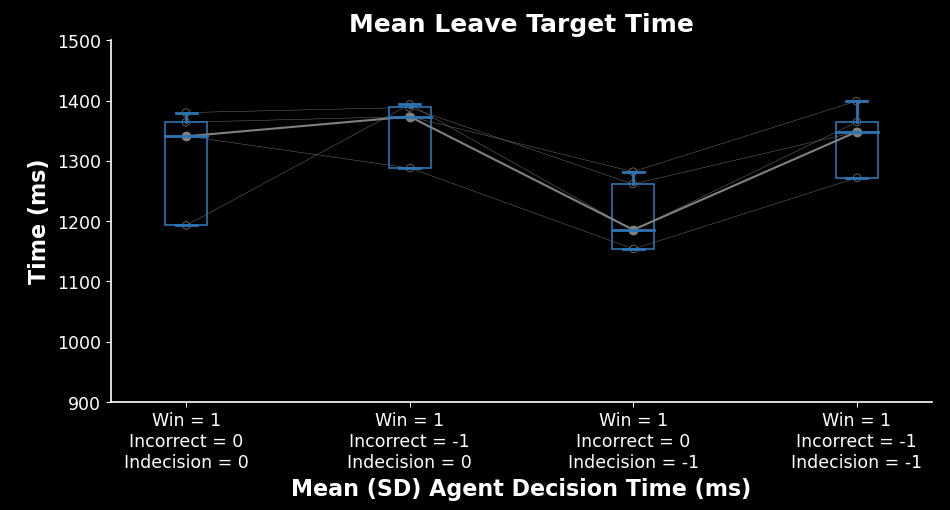

In [200]:
metric = np.nanmedian(group.player_task_leave_time,axis=2) 
optimal_metric = group_model.wtd_optimal_leave_target_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()


plt.show()

Player Minus Agent Mean Leave Target Time

In [201]:
np.nanmedian(group.player_minus_agent_task_leave_time,axis=2) 

array([[283.729797363, 288.250366211, 146.273681641, 272.762145996],
       [250.253295898, 189.324462891, 50.885986328, 190.033203125],
       [-323.026306152, -276.139343262, -248.298156738, -322.171264648],
       [268.856750488, 287.217224121, 181.338073730, 296.004089355],
       [75.950622559, 292.356628418, 94.589111328, 274.343261719]])

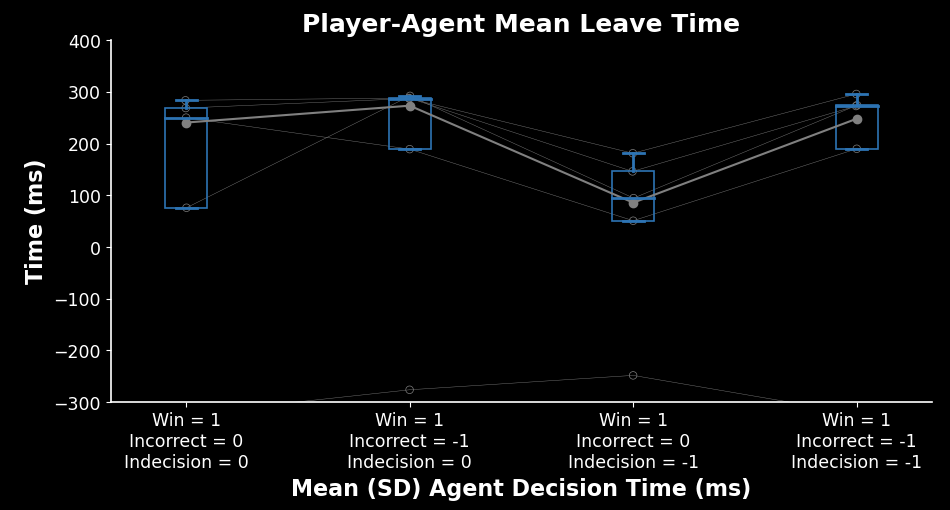

In [202]:
metric = np.nanmedian(group.player_minus_agent_task_leave_time,axis=2) 
optimal_metric = group_model.player_minus_agent_leave_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-300,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Player-Agent Mean Leave Time')
if save:
    axmain.set_axis_off()
    # plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

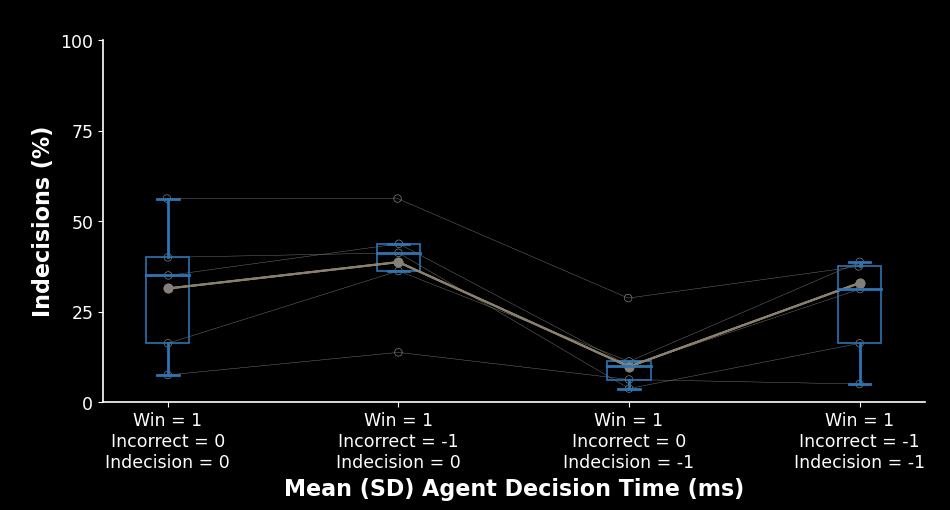

In [203]:
metric = group.player_perc_indecisions 
optimal_metric = group_model.prob_indecision_optimal_ER*100
optimal_metric_calc = group_model.perc_indecision_optimal_calc

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_model', dpi = 400, transparent = True)
    
axmain.set_axis_off()

plt.show()

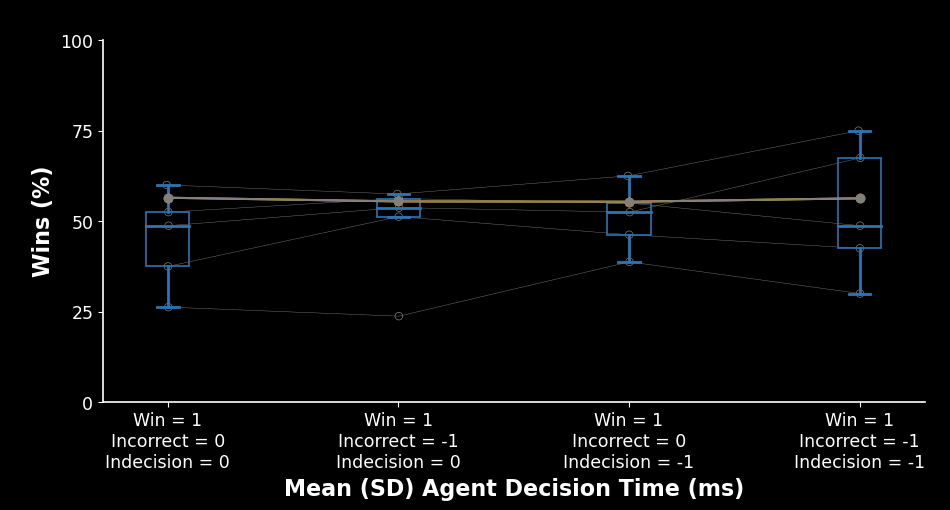

In [204]:
metric = group.player_perc_wins 
optimal_metric = group_model.prob_win_optimal_ER*100
optimal_metric_calc = group_model.perc_win_optimal_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

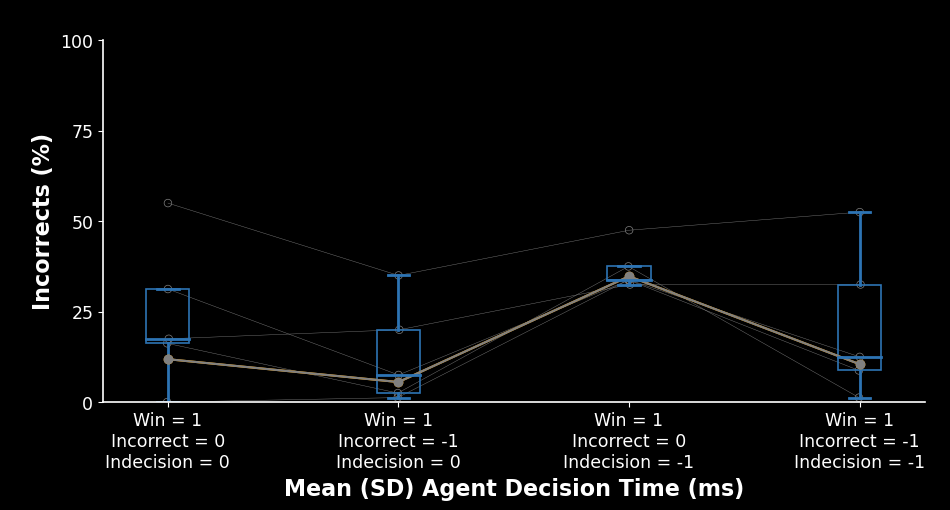

In [205]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric = group_model.prob_incorrect_optimal_ER*100
optimal_metric_calc = group_model.perc_incorrect_optimal_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Wins When Both Decide

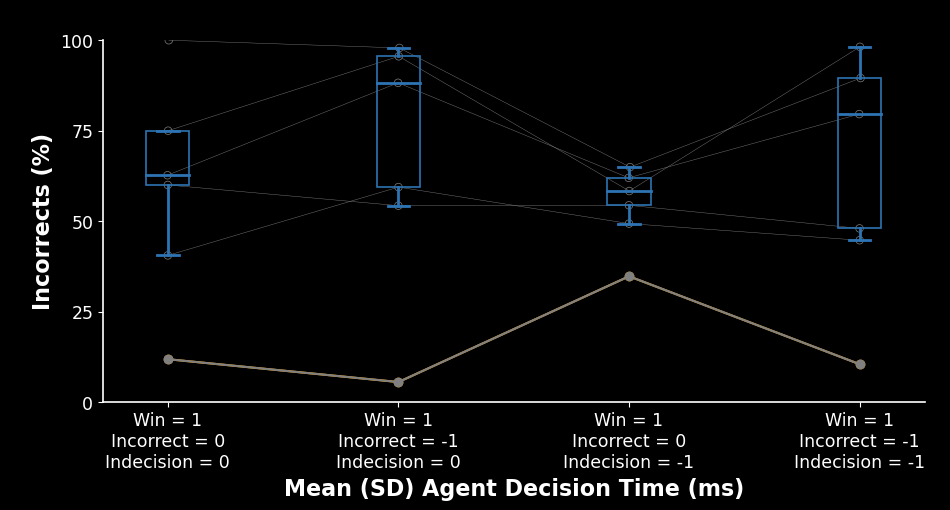

In [219]:
metric = group.player_perc_both_reached_wins 
optimal_metric = group_model.prob_incorrect_optimal_ER*100
optimal_metric_calc = group_model.perc_incorrect_optimal_calc

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='orange',marker='o')
ax.plot(xlocs,optimal_metric_calc,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Decisions

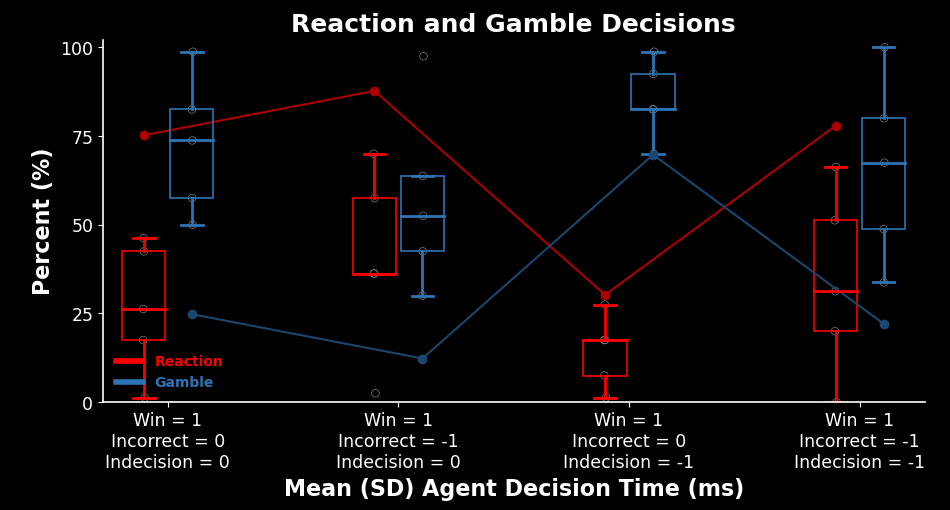

In [206]:
optimal_metric1 = group_model.prob_selecting_reaction_optimal_ER*100
optimal_metric2 = group_model.prob_selecting_gamble_optimal_ER*100
data_metric1 = group.combine_all_subjects('perc_reaction_decisions')
data_metric2 = group.combine_all_subjects('perc_gamble_decisions')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Leave Times

c:\Users\Seth Sullivan\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


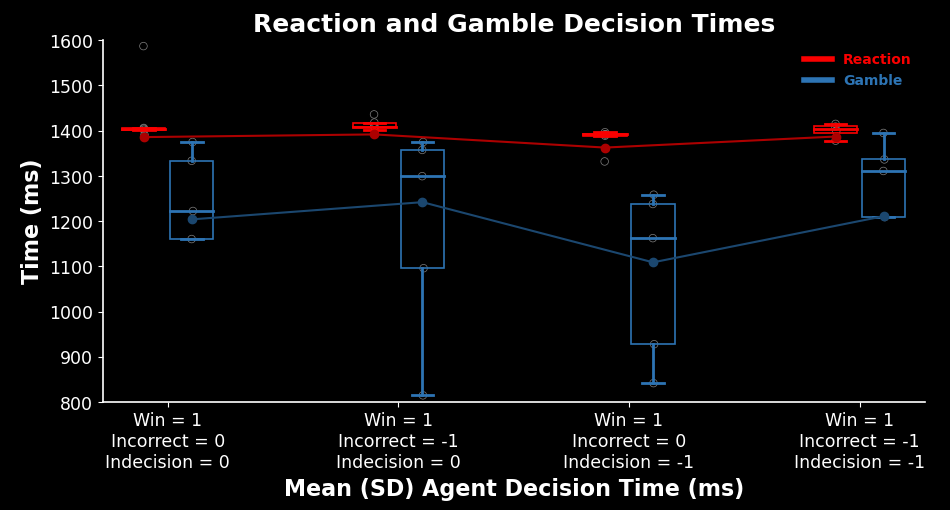

In [207]:
optimal_metric1 = group_model.optimal_reaction_leave_target_time_mean_calc
optimal_metric2 = group_model.optimal_gamble_leave_target_time_mean_calc
data_metric1 = np.nanmedian(group.player_reaction_task_leave_time,axis=2)
data_metric2 = np.nanmedian(group.player_gamble_task_leave_time,axis=2)

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_leave_times_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Agent Reaction and Gamble Decision Times

In [208]:
group_model.cutoff_agent_reaction_mean[0,1246]

1097.6146116311027

In [209]:
group_model.optimal_decision_time

array([1154.000000000, 1192.000000000, 1059.000000000, 1161.000000000])

c:\Users\Seth Sullivan\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


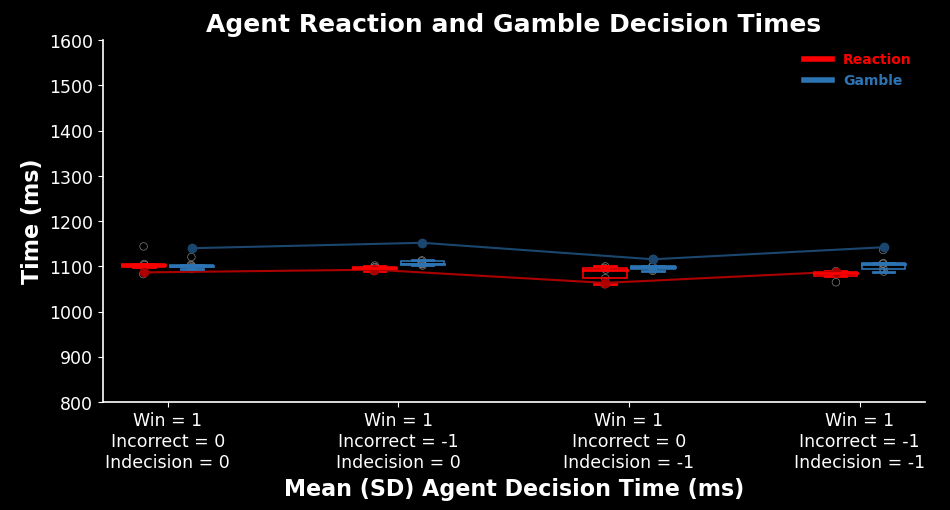

In [210]:
optimal_metric1 = group_model.cutoff_agent_reaction_mean_optimal_ER
optimal_metric2 = group_model.cutoff_agent_gamble_mean_optimal_ER
data_metric1 = np.nanmedian(group.agent_reaction_task_leave_time,axis=2)
data_metric2 = np.nanmedian(group.agent_gamble_task_leave_time,axis=2)

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Agent Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_leave_times_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions That Were Gambles

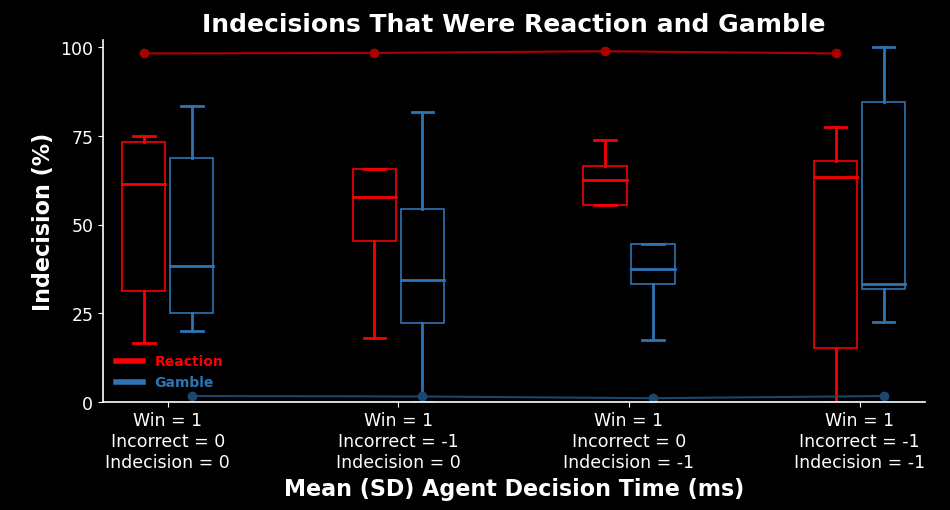

In [212]:
# Out of x number of indecisions, how many were reaction and gamble
metric1 = group.combine_all_subjects('perc_indecisions_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_indecisions_that_were_gambles') 
optimal_metric1 = group_model.perc_indecisions_that_were_reaction_optimal_calc
optimal_metric2 = group_model.perc_indecisions_that_were_gamble_optimal_calc
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Indecision (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Indecisions That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'reaction_and_gamble_indecisions', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

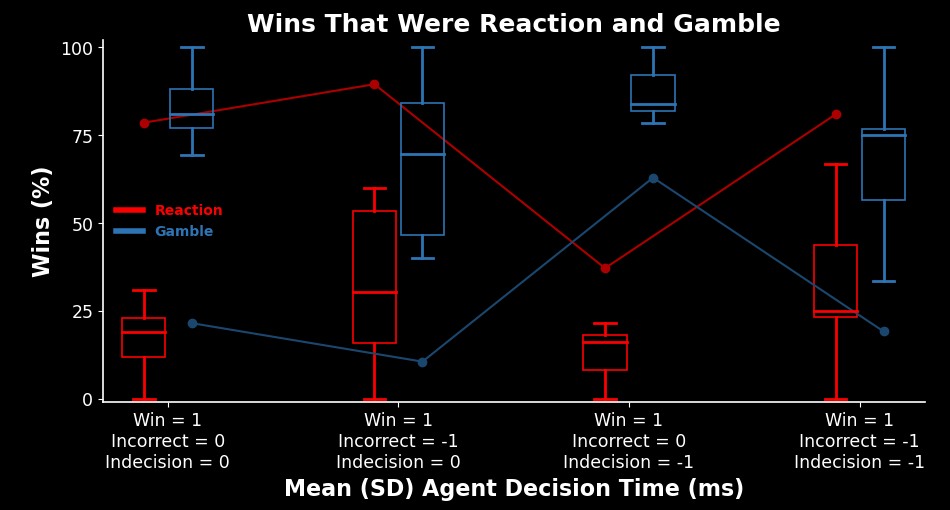

In [213]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_wins_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_wins_that_were_gambles') 
optimal_metric1 = group_model.perc_wins_that_were_reaction_optimal_calc
optimal_metric2 = group_model.perc_wins_that_were_gamble_optimal_calc
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Incorrects that were reaction and gamble

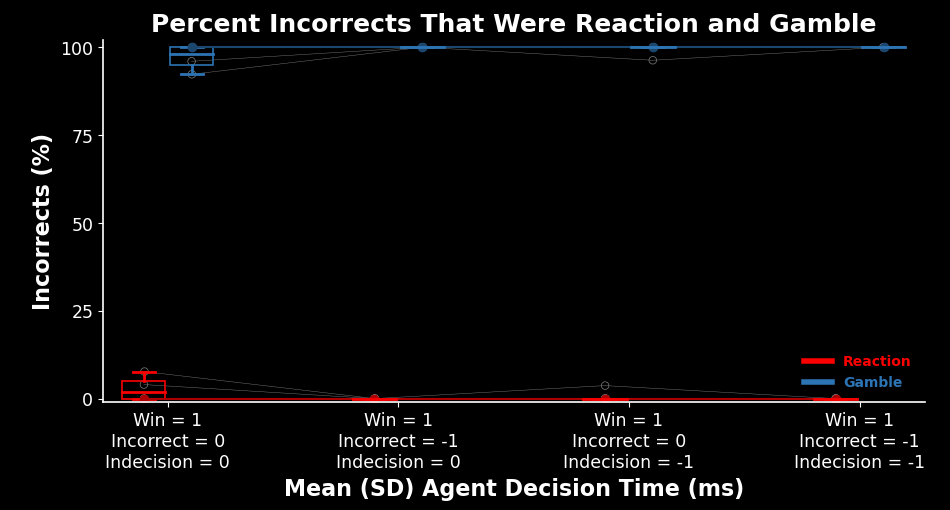

In [214]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_incorrects_that_were_reactions') 
metric2 = group.combine_all_subjects('perc_incorrects_that_were_gambles') 
optimal_metric1 = group_model.perc_incorrects_that_were_reaction_optimal_calc
optimal_metric2 = group_model.perc_incorrects_that_were_gamble_optimal_calc
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Incorrects (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Incorrects That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

OUt of the Reaction/Gamble How many times did they win

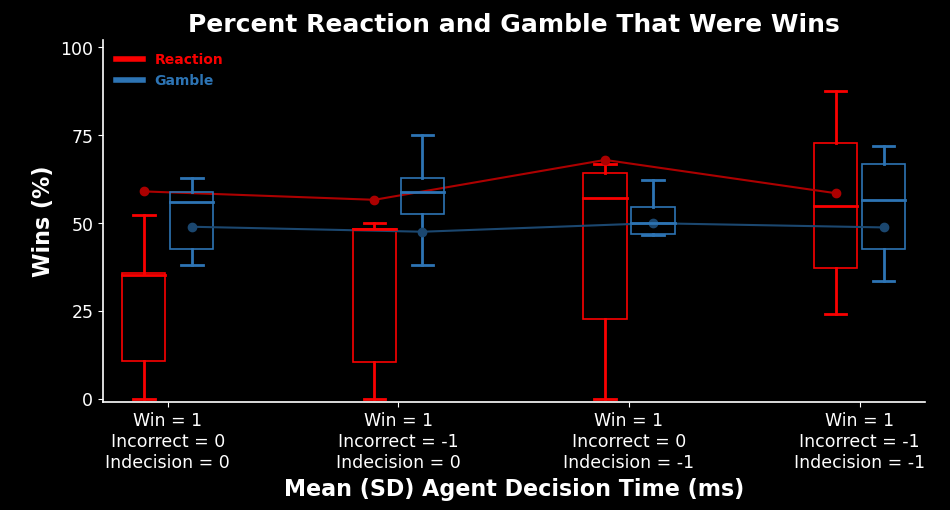

In [215]:
# Out of x number of reaction and gamble decisions, how many of them were wins
metric1 = group.combine_all_subjects('perc_reactions_that_were_wins') 
metric2 = group.combine_all_subjects('perc_gambles_that_were_wins') 
optimal_metric1 = group_model.perc_reactions_that_were_wins_optimal_calc
optimal_metric2 = group_model.perc_gambles_that_were_wins_optimal_calc
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Reaction and Gamble That Were Wins')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Percent Indecisions of Reaction and Gamble

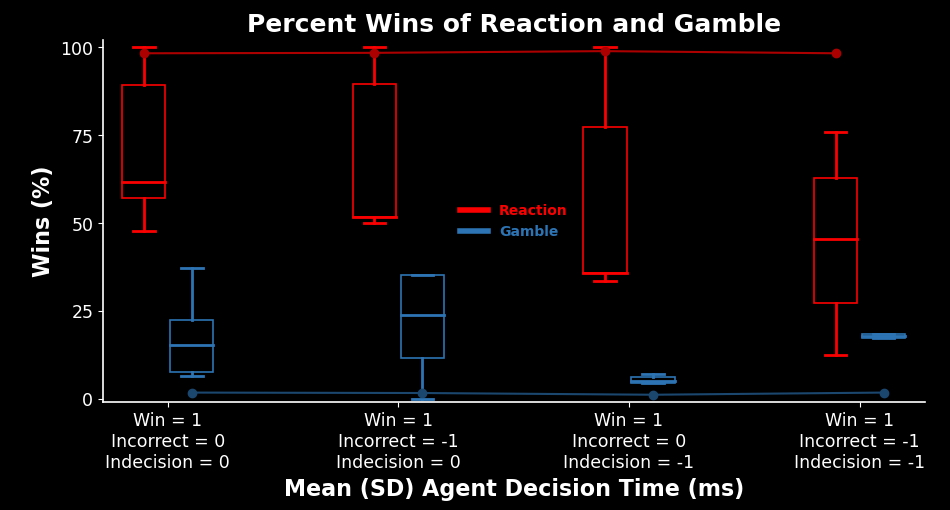

In [217]:
#!!!!!!!!!!!! Out of x number of reaction and gamble decisions, how many of them were indecisions!!!!!!!
metric1 = group.combine_all_subjects('perc_reactions_that_were_indecisions') 
metric2 = group.combine_all_subjects('perc_gambles_that_were_indecisions') 
optimal_metric1 = group_model.perc_indecisions_that_were_reaction_optimal_calc
optimal_metric2 = group_model.perc_indecisions_that_were_gamble_optimal_calc
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Wins of Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()